In [1]:
import robot_plotter as rp
import models_functions as mf
import traj
import numpy as np
import matplotlib.pyplot as plt
import robot_sim as sim
import sim_helper_funcs as hfunc
import save_load_data as sldat
import matplotlib.style as style 
#style.use('tableau-colorblind10')


In [2]:
# Now, load the all the data
dt=0.01
robData = []
datasets = ['collab_1anc_0d_meas2_noThres_noAmb']
data_N = len(datasets)

for i in range(data_N):
    robData.append( sldat.load_object(datasets[i], folder=r"D:\msc_data") )

# We assume that all these parameters are identical for each dataset
# get number of robots
robot_N = robData[0].ids.shape[0]
# Get number of runs
runs_N = robData[0].biases.shape[2]
# Get length of runs 
pos_N = robData[0].pos.shape[2]
# Get anchors
anchors = robData[0].anchors

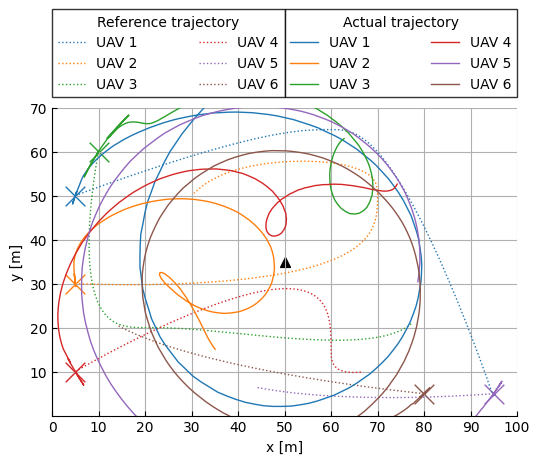

In [3]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['lines.linewidth'] = 1.0

# And plot:
s_idx = 5
d_idx = 0

end_sim = round(200/dt)

fig, ax = rp.setup_plot()
# Plot ground truth
for i in range(robot_N):
    name = 'UAV ' + str(i+1)
    rp.plot_position(ax, robData[d_idx].pos[i,:,:end_sim:100], color=color_cycle[i], marker=None, linestyle=':', draw_arrow=False, label=name) # fix label

# Plot states of robots:
for i in range(robot_N):
    name = 'UAV ' + str(i+1)
    rp.plot_position2(ax, robData[d_idx].x_log[i,:,:end_sim:100,s_idx], None, color=color_cycle[i], marker=None, draw_arrow=False, label=name)

# Mark the start position
for i in range(robot_N):
    ax.scatter(robData[d_idx].pos[i,1,0], robData[d_idx].pos[i,2,0], s=200.0, marker='x', color=color_cycle[i])

# Plot anchor positions
for anc in anchors:
    ax.scatter(anc.x[1,0], anc.x[2,0], s=50.0, marker='^', color='black')

# Organize the legend
handles, labels = ax.get_legend_handles_labels()
ref_handles = handles[:6]
ref_labels  = labels[:6]
act_handles = handles[6:]
act_labels  = labels[6:]
legend1 = ax.legend(ref_handles, ref_labels, title="Reference trajectory", loc='upper left', ncols=2, borderaxespad=0., fancybox=False, edgecolor='black', bbox_to_anchor=(0.0, 1.02, 0.5, 0.3), mode='expand')
legend2 = ax.legend(act_handles, act_labels, title="Actual trajectory", loc='upper left', ncols=2, borderaxespad=0., fancybox=False, edgecolor='black', bbox_to_anchor=(0.5, 1.02, 0.5, 0.3), mode = 'expand')
ax.add_artist(legend1)

plt.savefig("bad_traj.pdf", format="pdf", bbox_inches="tight")
